In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [91]:
df_index = pd.read_csv('economic_index.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [92]:
df_index.shape

(24, 6)

In [93]:
# drop unncessary columns such as month and year
df_index.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [94]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [95]:
# checking null value
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

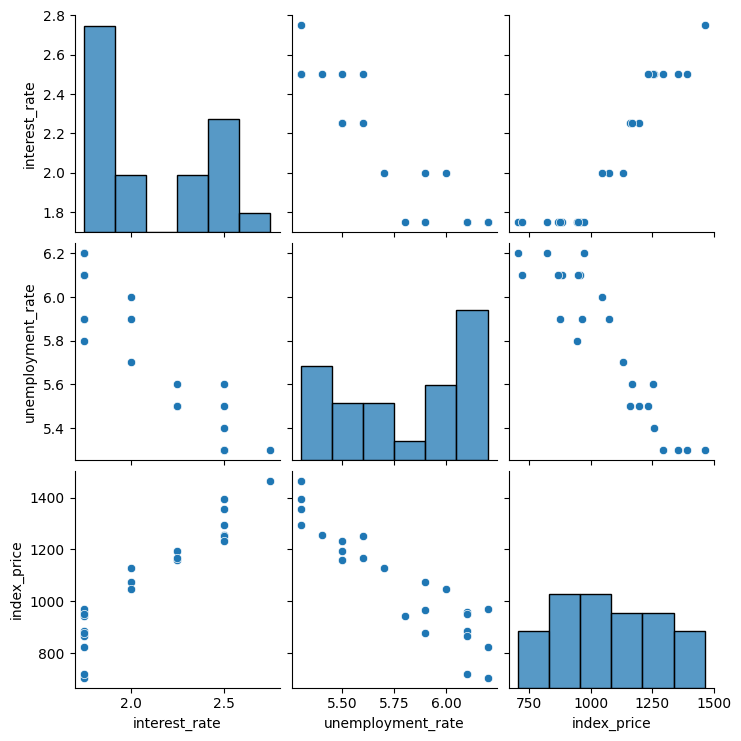

In [96]:
# visulaization of dataset

import seaborn as sns
sns.pairplot(df_index)

In [97]:
# correlation
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployement_rate')

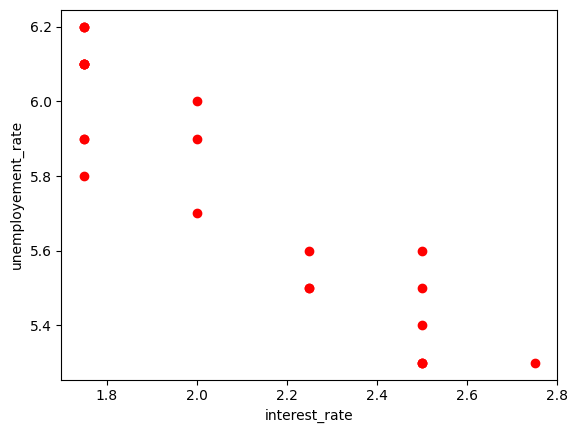

In [98]:
## visualize the data point more closely

plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("interest_rate")
plt.ylabel("unemployement_rate")

In [99]:
# indepent and dependent feature

# X = df_index[['interest_rate','unemployment_rate']]

X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]

In [100]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [101]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [102]:
# train test split
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.25,random_state=42)



<Axes: xlabel='interest_rate', ylabel='index_price'>

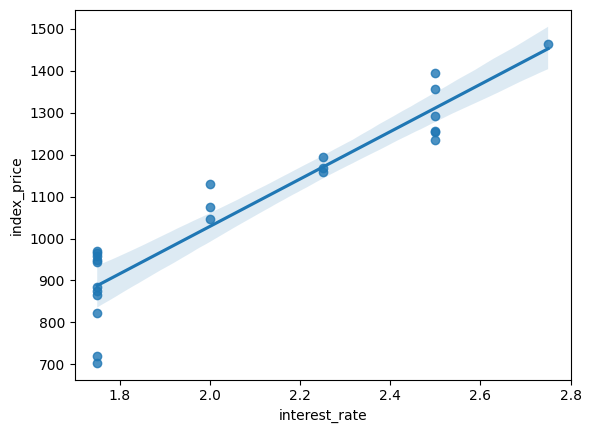

In [103]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

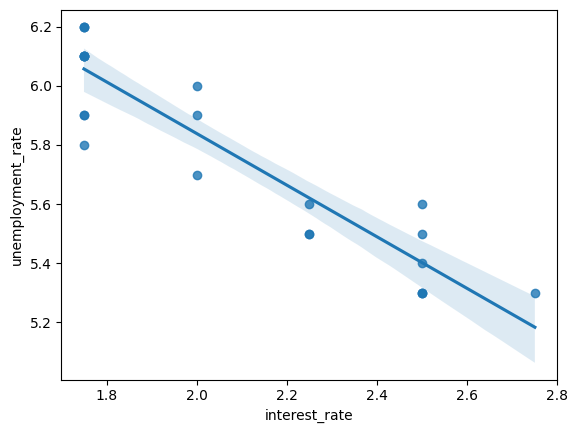

In [104]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])


<Axes: xlabel='index_price', ylabel='unemployment_rate'>

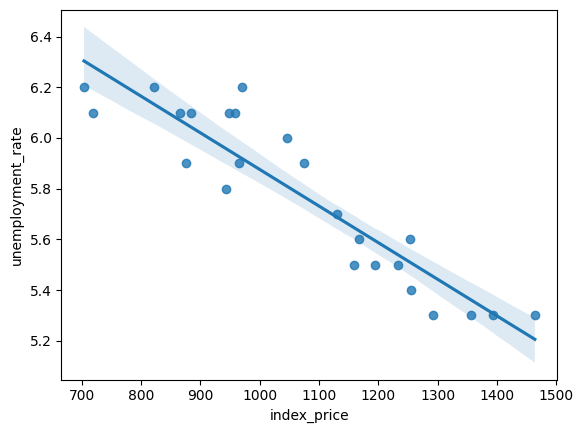

In [105]:
sns.regplot(x=df_index['index_price'],y=df_index['unemployment_rate'])


In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [107]:
X_train

array([[-0.8660254 ,  1.27807831],
       [ 0.8660254 , -1.14354375],
       [ 0.        , -0.3363364 ],
       [-0.8660254 ,  0.06726728],
       [-0.8660254 ,  1.27807831],
       [ 1.73205081, -1.14354375]])

In [108]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [109]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [110]:
# cross-validation

from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [111]:
np.mean(validation_score)

np.float64(-9155.900200400583)

In [112]:
## prediction

y_predict = regression.predict(X_test)

In [113]:
print(y_test)
print(y_predict)

8     1159
16     971
0     1464
18     884
11    1075
9     1167
13     965
1     1394
21     822
5     1254
2     1357
12    1047
15     958
3     1293
4     1256
22     704
17     949
20     876
Name: index_price, dtype: int64
[1213.53110048  735.94736842 1392.90909091  795.58851675  944.91866029
 1153.88995215  914.8708134  1362.86124402  735.94736842 1183.93779904
 1362.86124402  885.27751196  795.58851675 1362.86124402 1303.22009569
  735.94736842  795.58851675  914.8708134 ]


In [114]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , root_mean_squared_error

In [115]:
mse = mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

10540.34650966987
83.38702817650189
102.66618971048779


## Assumption

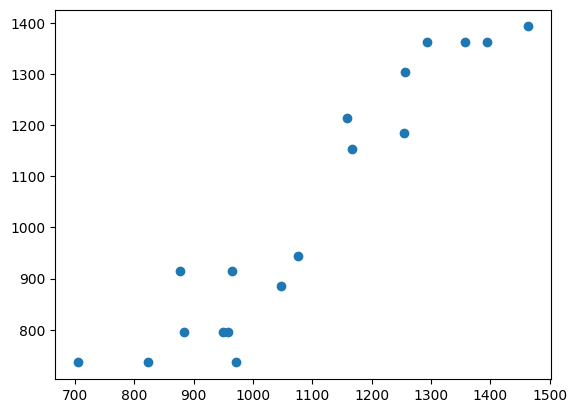

In [116]:
plt.scatter(y_test,y_predict)

In [117]:
residuals = y_test-y_predict
residuals

8     -54.531100
16    235.052632
0      71.090909
18     88.411483
11    130.081340
9      13.110048
13     50.129187
1      31.138756
21     86.052632
5      70.062201
2      -5.861244
12    161.722488
15    162.411483
3     -69.861244
4     -47.220096
22    -31.947368
17    153.411483
20    -38.870813
Name: index_price, dtype: float64

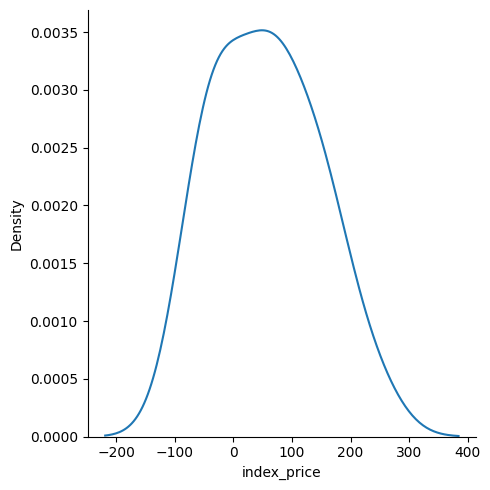

In [118]:
sns.displot(residuals,kind='kde')
# if get normal curve its mean you have done good

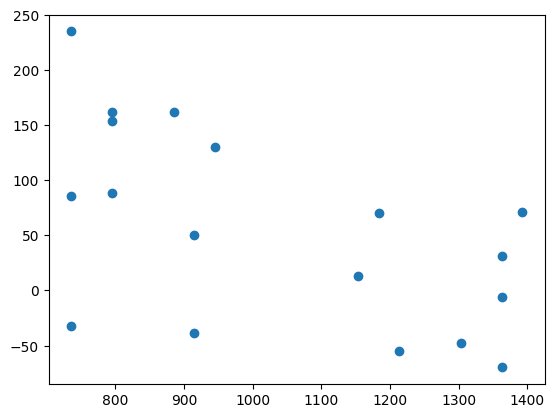

In [119]:
plt.scatter(y_predict,residuals) ## data is distributed uniformly its mean you have done good

In [120]:
regression.coef_

array([  34.69626498, -147.77156853])

In [121]:
regression.intercept_

np.float64(1014.4999999999994)

In [127]:
regression.predict([[2.75,3.5]])

array([592.71423885])